<a href="https://colab.research.google.com/github/srithaalluri/DS-1002/blob/main/Lab_FTX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1:  FTX

### Due Monday 1 April at noon

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. In November Bankman-Fried was found guilty on seven counts of fraud and conspiracy.  His sentencing hearing is today.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code.

**Put code and outputs in this notebook.**


## Group Submissions

As usual you may work in a group to complete this lab, with no more than 3 members in a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [ ]:
# Maya Justilien (emf6yd) and Sritha Alluri (fcx4bw).

## 1. Load Libraries & Data

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [12]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/ftx-2021-01-01--2023-12-31.csv')

## 2. Get Summary Data

In code, display how many rows and columns are in the raw dataset.

In [13]:
print(df.sum)
# the .sum function prints the number of rows and columns at the bottom of output
print()
df
# simply printing the dataframe will do a similar task
# 741 rows with 1 column

<bound method NDFrame._add_numeric_operations.<locals>.sum of     timeOpen;timeClose;timeHigh;timeLow;open;high;low;close;volume;marketCap;timestamp
0    2022-12-31T00:00:00.000Z;"2022-12-31T23:59:59....                                
1    2022-12-30T00:00:00.000Z;"2022-12-30T23:59:59....                                
2    2022-12-29T00:00:00.000Z;"2022-12-29T23:59:59....                                
3    2022-12-28T00:00:00.000Z;"2022-12-28T23:59:59....                                
4    2022-12-27T00:00:00.000Z;"2022-12-27T23:59:59....                                
..                                                 ...                                
736  2021-01-06T00:00:00.000Z;"2021-01-06T23:59:59....                                
737  2021-01-05T00:00:00.000Z;"2021-01-05T23:59:59....                                
738  2021-01-04T00:00:00.000Z;"2021-01-04T23:59:59....                                
739  2021-01-03T00:00:00.000Z;"2021-01-03T23:59:59....              

,timeOpen;timeClose;timeHigh;timeLow;open;high;low;close;volume;marketCap;timestamp
0,"2022-12-31T00:00:00.000Z;""2022-12-31T23:59:59...."
1,"2022-12-30T00:00:00.000Z;""2022-12-30T23:59:59...."
2,"2022-12-29T00:00:00.000Z;""2022-12-29T23:59:59...."
3,"2022-12-28T00:00:00.000Z;""2022-12-28T23:59:59...."
4,"2022-12-27T00:00:00.000Z;""2022-12-27T23:59:59...."
...,...
736,"2021-01-06T00:00:00.000Z;""2021-01-06T23:59:59...."
737,"2021-01-05T00:00:00.000Z;""2021-01-05T23:59:59...."
738,"2021-01-04T00:00:00.000Z;""2021-01-04T23:59:59...."
739,"2021-01-03T00:00:00.000Z;""2021-01-03T23:59:59...."


## 3. Clean and Organize the Data

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`



In [14]:
df = df.drop_duplicates()
df = df.dropna()

df[['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'open', 'high', 'low', 'close', 'volume', 'marketCap', 'timestamp']] = df['timeOpen;timeClose;timeHigh;timeLow;open;high;low;close;volume;marketCap;timestamp'].str.split(';', expand=True)
# This adds new columns as the old column split up

columns_to_drop = ['timeOpen;timeClose;timeHigh;timeLow;open;high;low;close;volume;marketCap;timestamp', 'timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'marketCap']
df = df.drop(columns=columns_to_drop)
# This drops the original column
df


,open,high,low,close,volume,timestamp
0,0.8389684425,0.853501666,0.8352262088,0.8426884241,3001502.06,"""2022-12-31T23:59:59.999Z"""
1,0.860193073,0.864751879,0.8266428992,0.8390481756,3608615.07,"""2022-12-30T23:59:59.999Z"""
2,0.8857226476,0.8871175386,0.8430286751,0.8602311608,3766979.57,"""2022-12-29T23:59:59.999Z"""
3,0.9211619958,0.9257015248,0.8698420242,0.8860908765,4192949.85,"""2022-12-28T23:59:59.999Z"""
4,0.9311378574,0.9554017418,0.9164143458,0.9236676658,4574953.05,"""2022-12-27T23:59:59.999Z"""
...,...,...,...,...,...,...
735,9.386493,10.00487172,9.21524402,9.56213089,46303336.73,"""2021-01-07T23:59:59.999Z"""
736,8.67128533,9.39079731,8.4259458,9.39079731,31404627.93,"""2021-01-06T23:59:59.999Z"""
737,7.52821638,8.71494656,7.08112034,8.66468773,49479278.39,"""2021-01-05T23:59:59.999Z"""
738,6.94867983,7.63214646,6.35821845,7.51407925,40526109.15,"""2021-01-04T23:59:59.999Z"""


Now display the first 10 rows of the cleaned dataset.

In [15]:
df.head(10)

,open,high,low,close,volume,timestamp
0,0.8389684425,0.853501666,0.8352262088,0.8426884241,3001502.06,"""2022-12-31T23:59:59.999Z"""
1,0.860193073,0.864751879,0.8266428992,0.8390481756,3608615.07,"""2022-12-30T23:59:59.999Z"""
2,0.8857226476,0.8871175386,0.8430286751,0.8602311608,3766979.57,"""2022-12-29T23:59:59.999Z"""
3,0.9211619958,0.9257015248,0.8698420242,0.8860908765,4192949.85,"""2022-12-28T23:59:59.999Z"""
4,0.9311378574,0.9554017418,0.9164143458,0.9236676658,4574953.05,"""2022-12-27T23:59:59.999Z"""
5,0.8945671492,1.0111825828,0.8936523976,0.9306958402,7065306.21,"""2022-12-26T23:59:59.999Z"""
6,0.9244321852,0.9355165843,0.8943699316,0.894656646,2577834.83,"""2022-12-25T23:59:59.999Z"""
7,0.9575050529,0.9756714327,0.9210848028,0.9244326068,5055004.16,"""2022-12-24T23:59:59.999Z"""
8,1.0271327165,1.0382822479,0.948058351,0.9570063953,17088962.94,"""2022-12-23T23:59:59.999Z"""
9,0.8739733875,1.1271983252,0.8356250943,1.0271616025,22418556.51,"""2022-12-22T23:59:59.999Z"""


## 4. Calculate Daily Gains/Losses

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Hint: This is not complicated and does not require a for-loop.  See the Pandas review notebook for reference.

In [16]:
df['close'].dtype

df['close'] = pd.to_numeric(df['close'])

df['close'].dtype

df['close_change'] = df[['close']].apply(lambda x: (x - x.shift(1)))
df
# another way we did it below
print()
df['close_change'] = df['close'].diff()
# creating 'close_change' column with the difference
df

,open,high,low,close,volume,timestamp,close_change
0,0.8389684425,0.853501666,0.8352262088,0.842688,3001502.06,"""2022-12-31T23:59:59.999Z""",NaN
1,0.860193073,0.864751879,0.8266428992,0.839048,3608615.07,"""2022-12-30T23:59:59.999Z""",-0.003640
2,0.8857226476,0.8871175386,0.8430286751,0.860231,3766979.57,"""2022-12-29T23:59:59.999Z""",0.021183
3,0.9211619958,0.9257015248,0.8698420242,0.886091,4192949.85,"""2022-12-28T23:59:59.999Z""",0.025860
4,0.9311378574,0.9554017418,0.9164143458,0.923668,4574953.05,"""2022-12-27T23:59:59.999Z""",0.037577
...,...,...,...,...,...,...,...
735,9.386493,10.00487172,9.21524402,9.562131,46303336.73,"""2021-01-07T23:59:59.999Z""",0.181143
736,8.67128533,9.39079731,8.4259458,9.390797,31404627.93,"""2021-01-06T23:59:59.999Z""",-0.171334
737,7.52821638,8.71494656,7.08112034,8.664688,49479278.39,"""2021-01-05T23:59:59.999Z""",-0.726110
738,6.94867983,7.63214646,6.35821845,7.514079,40526109.15,"""2021-01-04T23:59:59.999Z""",-1.150608


## 5. Identify Growth Days

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [ ]:
top_10 = df[df['close_change'] > 0].nlargest(10, 'close_change')
# narrowing down to positive growth, then the nlargest() pandas function filters data quicker (in fewer steps)
print(top_10[['close_change', 'timestamp']])

     close_change                   timestamp
56      16.623292  "2022-11-07T23:59:59.999Z"
468     14.497738  "2021-09-16T23:59:59.999Z"
598     14.017812  "2021-05-18T23:59:59.999Z"
478      9.506381  "2021-09-15T23:59:59.999Z"
473      8.315742  "2021-09-19T23:59:59.999Z"
484      6.929033  "2021-09-09T23:59:59.999Z"
350      6.770635  "2022-01-20T23:59:59.999Z"
594      6.228516  "2021-05-22T23:59:59.999Z"
481      5.201864  "2021-09-12T23:59:59.999Z"
605      5.154806  "2021-05-11T23:59:59.999Z"


## 6. Calculate the Percentage Rate of Change

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [17]:
df['rate_of_change'] = df['close_change'].pct_change()
# the pct_change() function computes percentage change
df

,open,high,low,close,volume,timestamp,close_change,rate_of_change
0,0.8389684425,0.853501666,0.8352262088,0.842688,3001502.06,"""2022-12-31T23:59:59.999Z""",NaN,NaN
1,0.860193073,0.864751879,0.8266428992,0.839048,3608615.07,"""2022-12-30T23:59:59.999Z""",-0.003640,NaN
2,0.8857226476,0.8871175386,0.8430286751,0.860231,3766979.57,"""2022-12-29T23:59:59.999Z""",0.021183,-6.819104
3,0.9211619958,0.9257015248,0.8698420242,0.886091,4192949.85,"""2022-12-28T23:59:59.999Z""",0.025860,0.220778
4,0.9311378574,0.9554017418,0.9164143458,0.923668,4574953.05,"""2022-12-27T23:59:59.999Z""",0.037577,0.453101
...,...,...,...,...,...,...,...,...
735,9.386493,10.00487172,9.21524402,9.562131,46303336.73,"""2021-01-07T23:59:59.999Z""",0.181143,-1.955785
736,8.67128533,9.39079731,8.4259458,9.390797,31404627.93,"""2021-01-06T23:59:59.999Z""",-0.171334,-1.945849
737,7.52821638,8.71494656,7.08112034,8.664688,49479278.39,"""2021-01-05T23:59:59.999Z""",-0.726110,3.237988
738,6.94867983,7.63214646,6.35821845,7.514079,40526109.15,"""2021-01-04T23:59:59.999Z""",-1.150608,0.584621


## 7. Identify Days of Greatest Percentage Change

Based on the rate change column calculated above, identify the top 5 days of greatest positive rate change, and the top 5 days of greatest negative rate change.

Display your results in a table showing both the rate of change and their dates.

In [18]:
top_5 = df[df['rate_of_change'] > 0].nlargest(5, 'rate_of_change')
# this narrows down to positive growth, and the nlargest() pandas function filters data in fewer steps
print(top_5[['rate_of_change', 'timestamp']])

bottom_5 = df[df['rate_of_change'] < 0].nsmallest(5, 'rate_of_change')
# this narrows down to negative growth, and the nsmallest() pandas function filters data in fewer steps
print(bottom_5[['rate_of_change', 'timestamp']])

     rate_of_change                   timestamp
110      273.028254  "2022-09-14T23:59:59.999Z"
516      216.674634  "2021-08-08T23:59:59.999Z"
182      178.229185  "2022-07-06T23:59:59.999Z"
369       97.180950  "2021-12-31T23:59:59.999Z"
216       58.778546  "2022-06-02T23:59:59.999Z"
     rate_of_change                   timestamp
135    -1146.635171  "2022-08-20T23:59:59.999Z"
240     -370.048919  "2022-05-10T23:59:59.999Z"
446     -166.691725  "2021-10-15T23:59:59.999Z"
193      -83.605800  "2022-06-25T23:59:59.999Z"
306      -79.028500  "2022-03-05T23:59:59.999Z"


## 8. Plot the Data

Create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

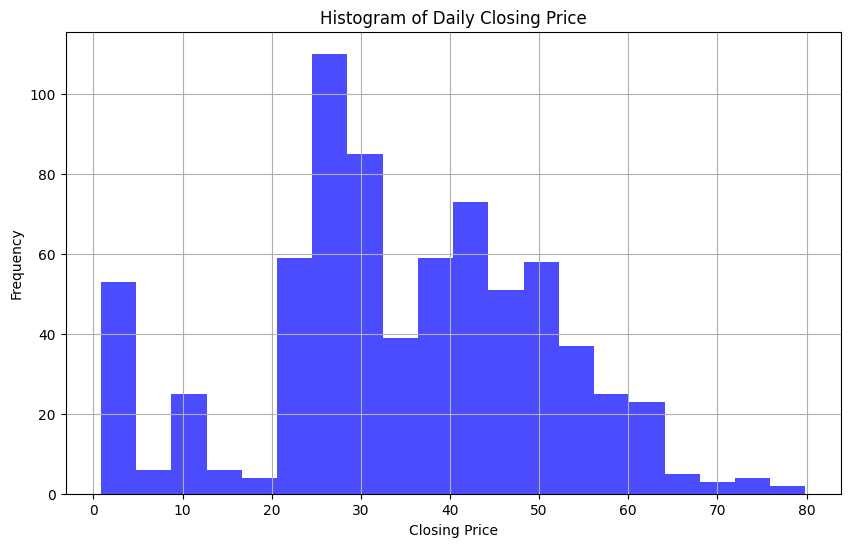

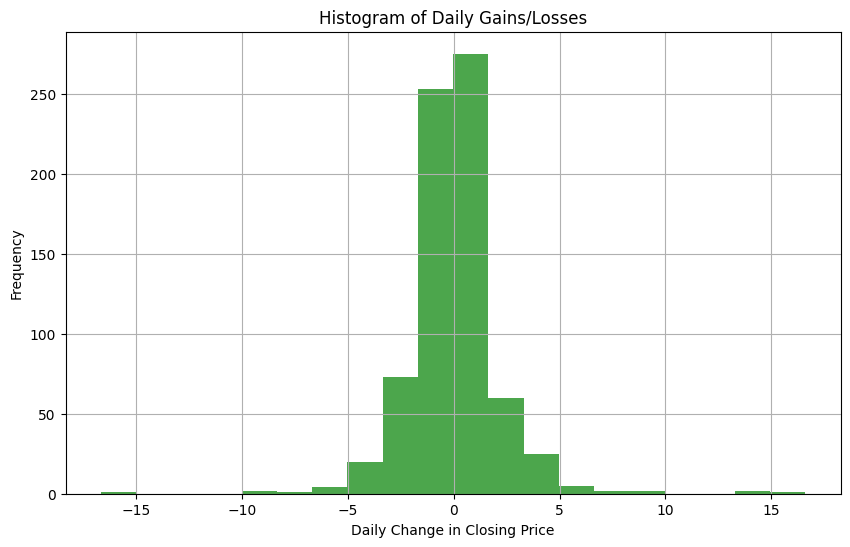

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['close'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Daily Closing Price')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
# setting figure size, labelling axes, and displaying plot
print()
plt.figure(figsize=(10, 6))
plt.hist(df['close_change'].dropna(), bins=20, color='green', alpha=0.7)
plt.title('Histogram of Daily Gains/Losses')
plt.xlabel('Daily Change in Closing Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Combine the two plots from above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

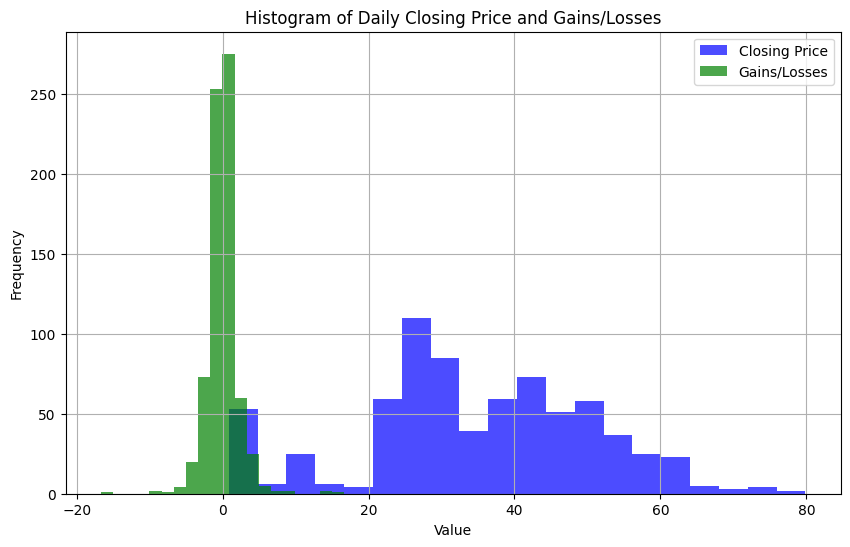

In [20]:
plt.figure(figsize=(10, 6))

# first histogram plotted
plt.hist(df['close'], bins=20, color='blue', alpha=0.7, label='Closing Price')

# second histogram plotted
plt.hist(df['close_change'], bins=20, color='green', alpha=0.7, label='Gains/Losses')

# adding labels and title
plt.title('Histogram of Daily Closing Price and Gains/Losses')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
# adding legend
# displays combined plot
plt.show()